In [1]:
#import necessary libraries
from fastai import *
from fastai.vision import *
from sklearn.model_selection import StratifiedKFold
import pickle

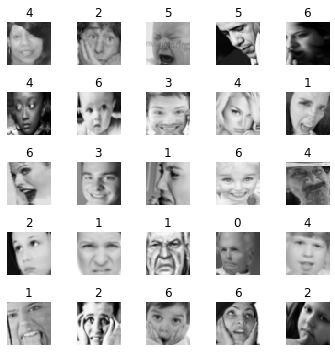

In [2]:
path = datapath4file('resampled_random_db')
tfms = get_transforms()
data = (ImageList.from_folder(path)
        .split_by_rand_pct(valid_pct=0.2)
        .label_from_folder()
        .transform(tfms, size=48)
        .databunch()).normalize(imagenet_stats)
data.show_batch(row=3, figsize=(5,5))

In [3]:
learn_resnet34 = cnn_learner(data, models.resnet34, metrics=accuracy)
learn_resnet50 = cnn_learner(data, models.resnet50, metrics=accuracy)

In [4]:
skf = StratifiedKFold(n_splits=10, shuffle=False, random_state=None)
df = data.to_df()

In [12]:
fastai_models = []
fastai_models.append(['resnet34', learn_resnet34])
fastai_models.append(['resnet50', learn_resnet50])

In [46]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

In [7]:
acc_val = []
results = []
for train_index, val_index in skf.split(df.index, df['y']):
    data_fold = (ImageList.from_df(df, path)
        .split_by_idxs(train_index, val_index)
        .label_from_df()
        .transform(tfms, size=48)
        .databunch(num_workers=0)).normalize(imagenet_stats)
    learn_resnet34.data = data_fold
    print(str(data_fold))
    sampler = data_fold.train_ds
    learn_resnet34.fit_one_cycle(1)
    loss,acc = learn_resnet34.validate()
    acc_val.append(acc)
results.append(['resnet34', str(np.mean(acc_val))])

In [9]:
acc_val = []
for train_index, val_index in skf.split(df.index, df['y']):
    data_fold = (ImageList.from_df(df, path)
        .split_by_idxs(train_index, val_index)
        .label_from_df()
        .transform(tfms, size=48)
        .databunch(num_workers=0)).normalize(imagenet_stats)
    learn_resnet50.data = data_fold
    print(str(data_fold))
    sampler = data_fold.train_ds
    learn_resnet50.fit_one_cycle(1)
    loss,acc = learn_resnet50.validate()
    acc_val.append(acc)
results.append(['resnet50', str(np.mean(acc_val))])

In [ ]:
for result in results:
    print('model name: ' + result[0] + ' model_acc: ' + result[1])
